In [ ]:
import tensorflow as tf
print(tf.__version__)

2.6.0


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from tensorflow import keras 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
import scipy
import seaborn as sns
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import Sequential 

# Question 2: ANN
- Software to detect network intrusions protects a computer network
from unauthorized users, including perhaps insiders. The intrusion
detector learning task is to build a predictive model (i.e. a classifier)
capable of distinguishing between 'bad' connections, called intrusions
or attacks, and 'good' normal connections.
- Read more: https://archive.ics.uci.edu/ml/datasets/KDD+Cup+1999+Data
### Requirement: 
- Use KDD dataset (kddcup.data.gz)  to try to classify a connection as 'normal.' or others.
- Make a new prediction for each sample in KDD test dataset (kddcup.testdata.unlabeled.gz).

In [ ]:
df = pd.read_csv('kddcup.data.gz')

In [ ]:
df.head()

,0,tcp,http,SF,215,45076,0.1,0.2,0.3,0.4,0.5,1,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,1.1,1.2,0.00,0.00.1,0.00.2,0.00.3,1.00,0.00.4,0.00.5,0.16,0.17,0.00.6,0.00.7,0.00.8,0.00.9,0.00.10,0.00.11,0.00.12,0.00.13,normal.
0,0,tcp,http,SF,162,4528,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,236,1228,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,233,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,238,1282,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5,5,1.0,0.0,0.20,0.0,0.0,0.0,0.0,0.0,normal.


In [ ]:
df.shape 

(4898430, 42)

In [ ]:
df.describe()

,0,215,45076,0.1,0.2,0.3,0.4,0.5,1,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,1.1,1.2,0.00,0.00.1,0.00.2,0.00.3,1.00,0.00.4,0.00.5,0.16,0.17,0.00.6,0.00.7,0.00.8,0.00.9,0.00.10,0.00.11,0.00.12,0.00.13
count,4.898430e+06,4.898430e+06,4.898430e+06,4.898430e+06,4.898430e+06,4.898430e+06,4.898430e+06,4.898430e+06,4.898430e+06,4.898430e+06,4.898430e+06,4.898430e+06,4.898430e+06,4.898430e+06,4.898430e+06,4.898430e+06,4898430.0,4.898430e+06,4.898430e+06,4.898430e+06,4.898430e+06,4.898430e+06,4.898430e+06,4.898430e+06,4.898430e+06,4.898430e+06,4.898430e+06,4.898430e+06,4.898430e+06,4.898430e+06,4.898430e+06,4.898430e+06,4.898430e+06,4.898430e+06,4.898430e+06,4.898430e+06,4.898430e+06,4.898430e+06
mean,4.834244e+01,1.834622e+03,1.093614e+03,5.716117e-06,6.487793e-04,7.961735e-06,1.243766e-02,3.205109e-05,1.435288e-01,8.088306e-03,6.818511e-05,3.674647e-05,1.293496e-02,1.188748e-03,7.430952e-05,1.021144e-03,0.0,4.082941e-07,8.351656e-04,3.349735e+02,2.952671e+02,1.779703e-01,1.780370e-01,5.766510e-02,5.773011e-02,7.898841e-01,2.117961e-02,2.826081e-02,2.329811e+02,1.892143e+02,7.537134e-01,3.071111e-02,6.050521e-01,6.464108e-03,1.780912e-01,1.778859e-01,5.792782e-02,5.765943e-02
std,7.233299e+02,9.414312e+05,6.450124e+05,2.390834e-03,4.285434e-02,7.215084e-03,4.689782e-01,7.299408e-03,3.506114e-01,3.856481e+00,8.257147e-03,8.082433e-03,3.938076e+00,1.241858e-01,8.737591e-03,3.551048e-02,0.0,6.389789e-04,2.888716e-02,2.119908e+02,2.459927e+02,3.818756e-01,3.822541e-01,2.322529e-01,2.326604e-01,3.892959e-01,8.271459e-02,1.405596e-01,6.402086e+01,1.059127e+02,4.111859e-01,1.085432e-01,4.809877e-01,4.125978e-02,3.818382e-01,3.821775e-01,2.309428e-01,2.309777e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,4.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,1.210000e+02,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.550000e+02,4.900000e+01,4.100000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,5.200000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,5.100000e+02,5.100000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.550000e+02,2.550000e+02,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,1.032000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,5.110000e+02,5.110000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.550000e+02,2.550000e+02,1.000000e+00,4.000000e-02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,5.832900e+04,1.379964e+09,1.309937e+09,1.000000e+00,3.000000e+00,1.400000e+01,7.700000e+01,5.000000e+00,1.000000e+00,7.479000e+03,1.000000e+00,2.000000e+00,7.468000e+03,4.300000e+01,2.000000e+00,9.000000e+00,0.0,1.000000e+00,1.000000e+00,5.110000e+02,5.110000e+02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.550

#Data Pre-processing

In [ ]:
#1. kiểm tra NaN: không có NaN
df.isna().sum()

0          0
tcp        0
http       0
SF         0
215        0
45076      0
0.1        0
0.2        0
0.3        0
0.4        0
0.5        0
1          0
0.6        0
0.7        0
0.8        0
0.9        0
0.10       0
0.11       0
0.12       0
0.13       0
0.14       0
0.15       0
1.1        0
1.2        0
0.00       0
0.00.1     0
0.00.2     0
0.00.3     0
1.00       0
0.00.4     0
0.00.5     0
0.16       0
0.17       0
0.00.6     0
0.00.7     0
0.00.8     0
0.00.9     0
0.00.10    0
0.00.11    0
0.00.12    0
0.00.13    0
normal.    0
dtype: int64

In [ ]:
#2. Loại bỏ những dòng bị trùng (all-columns, nếu có):
df = df.drop_duplicates()
df = df.reset_index(drop=True) 

In [ ]:
df.columns

Index(['0', 'tcp', 'http', 'SF', '215', '45076', '0.1', '0.2', '0.3', '0.4',
       '0.5', '1', '0.6', '0.7', '0.8', '0.9', '0.10', '0.11', '0.12', '0.13',
       '0.14', '0.15', '1.1', '1.2', '0.00', '0.00.1', '0.00.2', '0.00.3',
       '1.00', '0.00.4', '0.00.5', '0.16', '0.17', '0.00.6', '0.00.7',
       '0.00.8', '0.00.9', '0.00.10', '0.00.11', '0.00.12', '0.00.13',
       'normal.'],
      dtype='object')

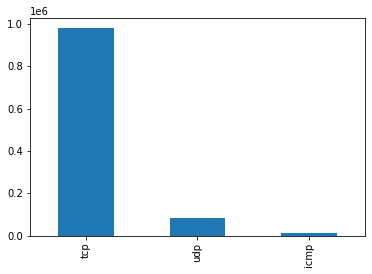

In [ ]:
df['tcp'].value_counts().plot.bar() 

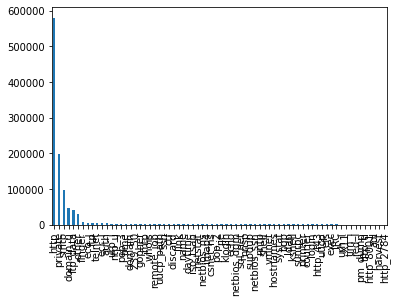

In [ ]:
df['http'].value_counts().plot.bar() 

In [ ]:
df['http'].value_counts()

http         580506
private      198745
smtp          96525
domain_u      46730
ftp_data      40426
              ...  
tftp_u            3
http_8001         2
aol               2
harvest           2
http_2784         1
Name: http, Length: 70, dtype: int64

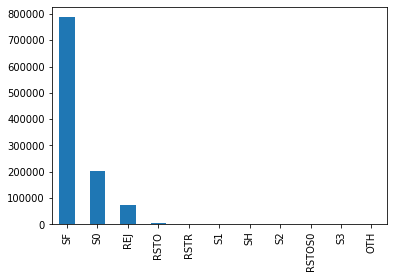

In [ ]:
df['SF'].value_counts().plot.bar() 

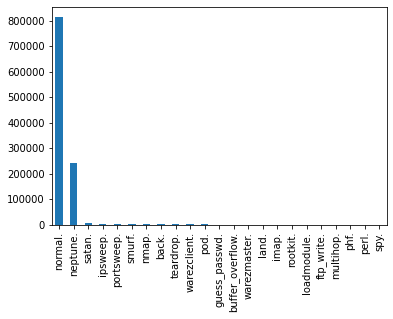

In [ ]:
df['normal.'].value_counts().plot.bar() 

In [ ]:
df['normal.'].value_counts()

normal.             812813
neptune.            242149
satan.                5019
ipsweep.              3723
portsweep.            3564
smurf.                3007
nmap.                 1554
back.                  968
teardrop.              918
warezclient.           893
pod.                   206
guess_passwd.           53
buffer_overflow.        30
warezmaster.            20
land.                   19
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: normal., dtype: int64

In [ ]:
#tạo cột label
#0: normal.
#1: other.
df['label'] = df['normal.'].map(lambda x: 0 if x=='normal.' else 1)

In [ ]:
df.head()

,0,tcp,http,SF,215,45076,0.1,0.2,0.3,0.4,0.5,1,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,1.1,1.2,0.00,0.00.1,0.00.2,0.00.3,1.00,0.00.4,0.00.5,0.16,0.17,0.00.6,0.00.7,0.00.8,0.00.9,0.00.10,0.00.11,0.00.12,0.00.13,normal.,label
0,0,tcp,http,SF,162,4528,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.,0
1,0,tcp,http,SF,236,1228,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.,0
2,0,tcp,http,SF,233,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.,0
3,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.,0
4,0,tcp,http,SF,238,1282,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5,5,1.0,0.0,0.20,0.0,0.0,0.0,0.0,0.0,normal.,0


In [ ]:
#các dòng khác normal. :
df[df['normal.'] !='normal.'].head()

,0,tcp,http,SF,215,45076,0.1,0.2,0.3,0.4,0.5,1,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,1.1,1.2,0.00,0.00.1,0.00.2,0.00.3,1.00,0.00.4,0.00.5,0.16,0.17,0.00.6,0.00.7,0.00.8,0.00.9,0.00.10,0.00.11,0.00.12,0.00.13,normal.,label
7343,184,tcp,telnet,SF,1511,2957,0,0,0,3,0,1,2,1,0,0,1,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,3,1.00,0.00,1.00,0.67,0.0,0.0,0.0,0.0,buffer_overflow.,1
7344,305,tcp,telnet,SF,1735,2766,0,0,0,3,0,1,2,1,0,0,1,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,4,1.00,0.00,0.50,0.50,0.0,0.0,0.0,0.0,buffer_overflow.,1
39408,79,tcp,telnet,SF,281,1301,0,0,0,2,0,1,1,1,0,0,4,2,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,10,1.00,0.00,1.00,0.30,0.0,0.0,0.0,0.1,loadmodule.,1
40041,25,tcp,telnet,SF,269,2333,0,0,0,0,0,1,0,1,0,2,2,1,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,69,2,0.03,0.06,0.01,0.00,0.0,0.0,0.0,0.0,perl.,1
72373,0,tcp,telnet,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0.5,1.0,0.0,0.0,0.5,1.0,0.0,1,2,1.00,0.00,1.00,1.00,1.0,0.5,0.0,0.0,neptune.,1


In [ ]:
df.shape

(1074991, 43)

In [ ]:
df['label'].value_counts()

0    812813
1    262178
Name: label, dtype: int64

#Xây dựng model

**Chuyển các cột dạng text sang nhị phân (dummies)**

In [ ]:
df = pd.get_dummies(data=df, columns=['tcp', 'http', 'SF'], drop_first=True)

In [ ]:
df.head()

,0,215,45076,0.1,0.2,0.3,0.4,0.5,1,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,1.1,1.2,0.00,0.00.1,0.00.2,0.00.3,1.00,0.00.4,0.00.5,0.16,0.17,0.00.6,0.00.7,0.00.8,0.00.9,0.00.10,0.00.11,0.00.12,0.00.13,normal.,label,...,http_netstat,http_nnsp,http_nntp,http_ntp_u,http_other,http_pm_dump,http_pop_2,http_pop_3,http_printer,http_private,http_red_i,http_remote_job,http_rje,http_shell,http_smtp,http_sql_net,http_ssh,http_sunrpc,http_supdup,http_systat,http_telnet,http_tftp_u,http_tim_i,http_time,http_urh_i,http_urp_i,http_uucp,http_uucp_path,http_vmnet,http_whois,SF_REJ,SF_RSTO,SF_RSTOS0,SF_RSTR,SF_S0,SF_S1,SF_S2,SF_S3,SF_SF,SF_SH
0,0,162,4528,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,236,1228,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,233,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,238,1282,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5,5,1.0,0.0,0.20,0.0,0.0,0.0,0.0,0.0,normal.,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


**Chọn input/ output**

In [ ]:
x = df.drop(['normal.', 'label'], axis=1)
y = df[['label']]

In [ ]:
#Scale dữ liệu
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x)
x = sc.transform(x)

In [ ]:
#split train & test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.2,
                                                    random_state = 0)

In [ ]:
X_train[0].shape #số input features

(119,)

**Xây dựng model ANN**

In [ ]:
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import Sequential 

**Initialize ANN**

In [ ]:
classifier = Sequential()

**Adding layers**

In [ ]:
#adding the input layer and the first hidden layer (119+1)/2 = 60
classifier.add(Dense(units = 60, activation='relu', input_shape=(119,))) #input
classifier.add(Dropout(rate=0.1))

In [ ]:
#adding the second hidden layer
classifier.add(Dense(units=60,
                     activation='relu'))
classifier.add(Dropout(rate=0.1))

In [ ]:
#adding the output layer
classifier.add(Dense(units=1,
                     activation='sigmoid')) #like the logistic regression

**Compiling ANN**

In [ ]:
classifier.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

In [ ]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 60)                7200      
_________________________________________________________________
dropout (Dropout)            (None, 60)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 60)                3660      
_________________________________________________________________
dropout_1 (Dropout)          (None, 60)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 61        
Total params: 10,921
Trainable params: 10,921
Non-trainable params: 0
_________________________________________________________________


**Fit classifier to training set**

In [ ]:
history = classifier.fit(X_train, y_train,
                         epochs=100,
                         batch_size=256,
                         validation_data=(X_test, y_test))

Epoch 1/100
3360/3360 [==============================] - 19s 5ms/step - loss: 0.0110 - accuracy: 0.9974 - val_loss: 0.0037 - val_accuracy: 0.9989
Epoch 2/100
3360/3360 [==============================] - 15s 5ms/step - loss: 0.0039 - accuracy: 0.9988 - val_loss: 0.0032 - val_accuracy: 0.9991
Epoch 3/100
3360/3360 [==============================] - 14s 4ms/step - loss: 0.0032 - accuracy: 0.9991 - val_loss: 0.0025 - val_accuracy: 0.9993
Epoch 4/100
3360/3360 [==============================] - 15s 5ms/step - loss: 0.0027 - accuracy: 0.9992 - val_loss: 0.0026 - val_accuracy: 0.9993
Epoch 5/100
3360/3360 [==============================] - 16s 5ms/step - loss: 0.0025 - accuracy: 0.9992 - val_loss: 0.0023 - val_accuracy: 0.9994
Epoch 6/100
3360/3360 [==============================] - 14s 4ms/step - loss: 0.0023 - accuracy: 0.9993 - val_loss: 0.0024 - val_accuracy: 0.9994
Epoch 7/100
3360/3360 [==============================] - 14s 4ms/step - loss: 0.0023 - accuracy: 0.9993 - val_loss: 0.0021 -

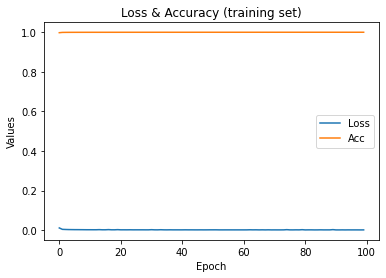

In [ ]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('Loss & Accuracy (training set)')
plt.xlabel('Epoch')
plt.ylabel('Values')
plt.legend(['Loss', 'Acc'])
plt.show()

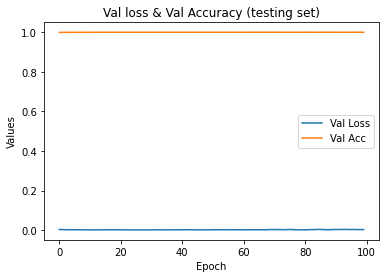

In [ ]:
plt.figure()
plt.plot(history.history['val_loss'])
plt.plot(history.history['val_accuracy'])
plt.title('Val loss & Val Accuracy (testing set)')
plt.xlabel('Epoch')
plt.ylabel('Values')
plt.legend(['Val Loss', 'Val Acc'])
plt.show()

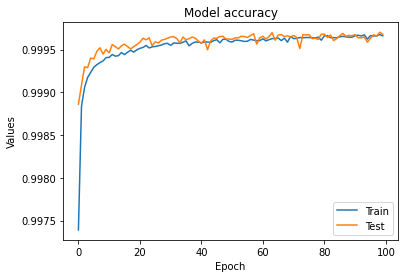

In [ ]:
#so sánh acc giữa train và test: overfitting/ underfitting ==> No
plt.figure()
plt.plot(history.history['accuracy']) #train
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Values')
plt.legend(['Train', 'Test'])
plt.show()

Nhận xét: từ 3 biểu đồ trên ta có nhận xét loss của train và test đều thấp. Accuracy của train và test đều cao --> model dự đoán tốt, không bị under/overfitting

In [ ]:
#make prediction 
y_pred = classifier.predict(X_test)

#Đánh giá model và dự đoán dữ liệu mới

In [ ]:
y_pred[:5]

array([[6.0982179e-19],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.3335079e-08],
       [8.3142111e-14]], dtype=float32)

In [ ]:
#Trên 0.5 --> 1, ngược lại 0
y_pred = y_pred >= 0.5
print(y_pred)

[[False]
 [ True]
 [ True]
 ...
 [False]
 [ True]
 [False]]


In [ ]:
#making the confusion matrix
from sklearn.metrics import confusion_matrix
#tạo ra giá trị dự đoán tự tập test
#y thực tế và y dự đoán
cm = confusion_matrix(y_test, y_pred)
cm

array([[162348,     20],
       [    49,  52582]])

In [ ]:
acc = (cm[0][0] + cm[1][1]) / (cm[0][0] + cm[0][1] +cm[1][0] +cm[1][1] )
print(acc) 

0.9996790682747362


In [ ]:
#evaluation
print('Accuracy:', classifier.evaluate(X_test, y_test))

6719/6719 [==============================] - 17s 2ms/step - loss: 0.0030 - accuracy: 0.9997
Accuracy: [0.0030230286065489054, 0.9996790885925293]


Nhận xét: từ confusion matrix và accuracy, model phù hợp để dự đoán

#Dự đoán dữ liệu mới

In [ ]:
df_predict = pd.read_csv('kddcup.testdata.unlabeled.gz')

In [ ]:
#1. kiểm tra NaN: không có NaN
df_predict.isna().sum()

0          0
udp        0
private    0
SF         0
105        0
146        0
0.1        0
0.2        0
0.3        0
0.4        0
0.5        0
0.6        0
0.7        0
0.8        0
0.9        0
0.10       0
0.11       0
0.12       0
0.13       0
0.14       0
0.15       0
0.16       0
1          0
1.1        0
0.00       0
0.00.1     0
0.00.2     0
0.00.3     0
1.00       0
0.00.4     0
0.00.5     0
1.2        0
1.3        0
1.00.1     0
0.00.6     0
1.00.2     0
0.00.7     0
0.00.8     0
0.00.9     0
0.00.10    0
0.00.11    0
dtype: int64

In [ ]:
df_predict.shape

(2984153, 41)

In [ ]:
#2. Loại bỏ những dòng bị trùng (all-columns, nếu có):
df_predict = df_predict.drop_duplicates()
df_predict = df_predict.reset_index(drop=True)

In [ ]:
df_predict.head()

,0,udp,private,SF,105,146,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,1,1.1,0.00,0.00.1,0.00.2,0.00.3,1.00,0.00.4,0.00.5,1.2,1.3,1.00.1,0.00.6,1.00.2,0.00.7,0.00.8,0.00.9,0.00.10,0.00.11
0,0,udp,private,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.00,0.01,0.00,0.0,0.0,0.0,0.0,0.0
1,0,udp,private,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.00,0.01,0.01,0.0,0.0,0.0,0.0,0.0
2,0,udp,private,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,253,0.99,0.01,0.01,0.0,0.0,0.0,0.0,0.0
3,0,udp,private,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,252,0.99,0.01,0.00,0.0,0.0,0.0,0.0,0.0
4,0,udp,private,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,253,0.99,0.01,0.00,0.0,0.0,0.0,0.0,0.0


In [ ]:
#chuyển các cột dạng text sang dummies
df_predict = pd.get_dummies(data=df_predict, columns=['udp', 'private', 'SF'], drop_first=True)

In [ ]:
df_predict.head()

,0,105,146,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,1,1.1,0.00,0.00.1,0.00.2,0.00.3,1.00,0.00.4,0.00.5,1.2,1.3,1.00.1,0.00.6,1.00.2,0.00.7,0.00.8,0.00.9,0.00.10,0.00.11,udp_tcp,udp_udp,...,private_netbios_ssn,private_netstat,private_nnsp,private_nntp,private_ntp_u,private_other,private_pm_dump,private_pop_2,private_pop_3,private_printer,private_private,private_remote_job,private_rje,private_shell,private_smtp,private_sql_net,private_ssh,private_sunrpc,private_supdup,private_systat,private_telnet,private_tftp_u,private_tim_i,private_time,private_urh_i,private_urp_i,private_uucp,private_uucp_path,private_vmnet,private_whois,SF_REJ,SF_RSTO,SF_RSTOS0,SF_RSTR,SF_S0,SF_S1,SF_S2,SF_S3,SF_SF,SF_SH
0,0,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.00,0.01,0.00,0.0,0.0,0.0,0.0,0.0,0,1,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.00,0.01,0.01,0.0,0.0,0.0,0.0,0.0,0,1,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,253,0.99,0.01,0.01,0.0,0.0,0.0,0.0,0.0,0,1,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,252,0.99,0.01,0.00,0.0,0.0,0.0,0.0,0.0,0,1,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,253,0.99,0.01,0.00,0.0,0.0,0.0,0.0,0.0,0,1,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
df_predict.shape

(576449, 119)

In [ ]:
#Scale dữ liệu
df_predict = sc.transform(df_predict)

In [ ]:
#make prediction 
y_pred_new = classifier.predict(df_predict)

In [ ]:
y_pred_new[:5]

array([[0.00026485],
       [0.00033349],
       [0.00038912],
       [0.00033008],
       [0.00030865]], dtype=float32)

In [ ]:
#Trên 0.5 --> 1, ngược lại 0
y_pred_new = y_pred_new >= 0.5

In [ ]:
y_pred_new[:5]

array([[False],
       [False],
       [False],
       [False],
       [False]])